In [1]:
%matplotlib inline

import xarray as xr
import matplotlib.pyplot as plt

## Load the data

First run [run_ensemble](./run_ensemble.ipynb) to generate the `ensemble.nc`
data file.

In [2]:
data = xr.load_dataset('test_multi.nc')
data

<xarray.Dataset>
Dimensions:          (ensemble_member: 1000, time: 141)
Coordinates:
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 ... 995 996 997 998 999
  * time             (time) int64 0 1 2 3 4 5 6 ... 134 135 136 137 138 139 140
    r0               (ensemble_member) float64 34.24 32.17 37.65 ... 33.9 37.95
    rc               (ensemble_member) float64 0.04698 0.02986 ... 0.01838
    rt               (ensemble_member) float64 4.099 0.4684 ... 2.83 2.267
    F2x              (ensemble_member) float64 4.127 3.66 3.678 ... 3.737 3.717
    tcr              (ensemble_member) float64 2.757 1.203 1.384 ... 2.842 1.912
    ecs              (ensemble_member) float64 3.57 1.688 2.843 ... 4.144 4.671
    other_rf         (ensemble_member) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    C                (time) float64 284.3 287.2 290.0 ... 1.134e+03 1.145e+03
Data variables:
    temperature      (ensemble_member, time) float64 0.01993 0.04438 ... 4.737
    forcing          (ensemble_member, time) float64 0.1338 0.1931 ... 7.591
    emissions        (ensemble_member, time) float64 13.45 19.51 ... 33.12 33.34

## Calculate basic statistical properties

As both the input and output data is stored in the netcdf file we can explore
both the parameter space and the response space.

Plot the input ECS and TCR used in forcing the model:

Text(0, 0.5, 'ECS')

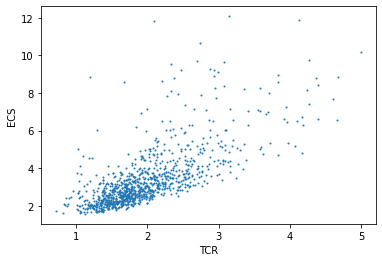

In [4]:
# plot scatter plot of the input pairs of ECS and TCR
fig, ax = plt.subplots()
ax.scatter(data.tcr, data.ecs, marker='o', s=(72./fig.dpi)**2)
ax.set_xlabel('TCR')
ax.set_ylabel('ECS')

Plot the ensemble mean emissions curve and ensemble standard deviation:

In [5]:
# add a temporary year coordinate

data.coords["year"] = data.time + 1850
data = data.swap_dims({"time": "year"})

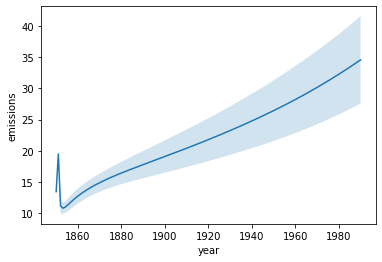

In [6]:
# plot the ensemble mean with +/- 1 std.dev. as a filled region
ens_mean = data.emissions.mean('ensemble_member')
ens_std = data.emissions.std('ensemble_member')

fig, ax = plt.subplots()

ax.fill_between(data.year, ens_mean - ens_std, ens_mean + ens_std, alpha=0.2)
ens_mean.plot(ax=ax)

Text(0.5, 1.0, 'All ensemble members temperature trajectory')

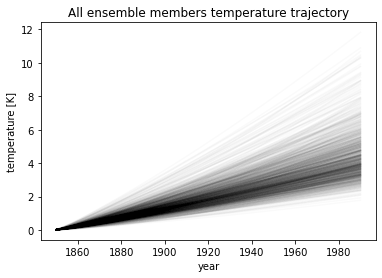

In [7]:
# plot all the temperature trajectory for all ensemble members
# overlaid with low opacity to demostrate distribution density

# WARNING: Do not do this for very large ensembles! rendering is very slow

fig, ax = plt.subplots()

for member in data.ensemble_member:
    d = data.temperature.sel(ensemble_member=member)
    d.plot(ax=ax, color='black', alpha=0.02)

ax.set_title("All ensemble members temperature trajectory")